# Zadanie 1

### Wyliczenie transformaty Laplace'a dla zadanych funkcji, wykorzystując bibliotekę sympy. Biblioteki pandas oraz IPython wykorzystane jedynie do stworzenia tabeli.

In [111]:
import sympy as sp
import pandas as pd
from IPython.display import display, Markdown, Math
from sympy.printing.latex import latex
sp.init_printing()

A, B = 3, 3
C = A + B
t, s = sp.symbols('t, s')
f1_t = A * t * sp.exp(-B * t)
f2_t = A - sp.exp(-2*t) * (sp.sin(t - B) - sp.cos(t - B) 
                            + sp.sin(t - C) * sp.cos(t - C))
F1_s = sp.laplace_transform(f1_t, t, s, noconds=True).simplify()
F2_s = sp.laplace_transform(f2_t, t, s, noconds=True).simplify()

table1 = pd.DataFrame({
    "Funkcja $f(t)$": [f"$$f_{1}(t) = {sp.latex(f1_t)} $$", f"$$f_{2}(t) = {sp.latex(f2_t)} $$"]
})
table2 = pd.DataFrame({
    "Transformata Laplace'a $F(s)$": [f"$$F_{1}(s) = {sp.latex(F1_s)} $$", f"$$F_{2}(s) = {sp.latex(F2_s)} $$"]
})

display(Markdown(table1.to_markdown(index=False)))
display(Markdown(table2.to_markdown(index=False)))

| Funkcja $f(t)$                                                                                                                                         |
|:-------------------------------------------------------------------------------------------------------------------------------------------------------|
| $$f_1(t) = 3 t e^{- 3 t} $$                                                                                                                            |
| $$f_2(t) = - \left(\sin{\left(t - 6 \right)} \cos{\left(t - 6 \right)} + \sin{\left(t - 3 \right)} - \cos{\left(t - 3 \right)}\right) e^{- 2 t} + 3 $$ |

| Transformata Laplace'a $F(s)$                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| $$F_1(s) = \frac{3}{\left(s + 3\right)^{2}} $$                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| $$F_2(s) = \frac{\frac{s \left(\left(s + 2\right) \sin{\left(12 \right)} - 2 \cos{\left(12 \right)}\right) \left(\left(s + 2\right)^{2} + 1\right)}{2} + s \left(\left(s + 2\right)^{2} + 4\right) \left(\sqrt{2} s \sin{\left(\frac{\pi}{4} + 3 \right)} + \cos{\left(3 \right)} + 3 \sin{\left(3 \right)}\right) + 3 \left(\left(s + 2\right)^{2} + 1\right) \left(\left(s + 2\right)^{2} + 4\right)}{s \left(\left(s + 2\right)^{2} + 1\right) \left(\left(s + 2\right)^{2} + 4\right)} $$ |

### Symulacja odpowiedzi układu, o transmitancji równej F1(s), na skok jednostkowy (amplitudy 1 i 5).
Wykorzystano biblioteki control oraz sympy.

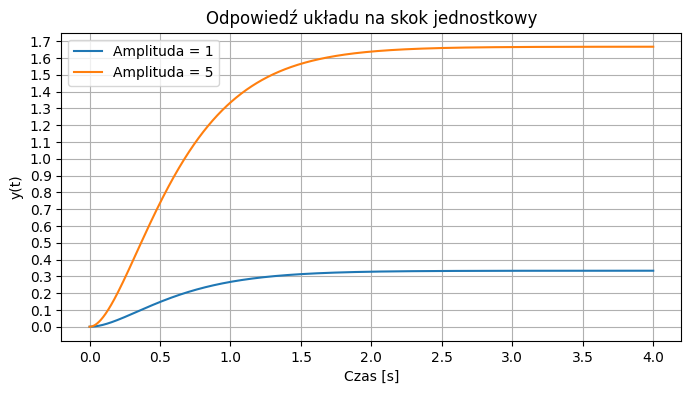

In [112]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

L_s, M_s = sp.fraction(F1_s)
num_coeffs = [float(c) for c in sp.Poly(L_s, s).all_coeffs()]
den_coeffs = [float(c) for c in sp.Poly(M_s, s).all_coeffs()]

K_s = ctrl.TransferFunction(num_coeffs, den_coeffs)

T = np.linspace(0, 4, 1200)
plt.figure(figsize=(8,4))
for A_step in [1, 5]:
    T, y_t = ctrl.step_response(A_step * K_s, T)
    plt.plot(T, y_t, label=f"Amplituda = {A_step}")


plt.yticks([i/10 for i in range(18)])
plt.xticks([i/2 for i in range(9)])

plt.title("Odpowiedź układu na skok jednostkowy")
plt.xlabel("Czas [s]")
plt.ylabel("y(t)")
plt.legend()
plt.grid()
plt.show()

### Wyliczenie teorytycznej odpowiedzi systemu

In [113]:
table = pd.DataFrame({
    "Amplituda": [f"1", f"5"],
    "Teorytyczna odpowiedź systemu $y(t)$": [f"$$ {sp.latex(sp.inverse_laplace_transform(F1_s * 1/s, s, t, noconds=True))} $$", f"$$ {sp.latex(sp.inverse_laplace_transform(5*F1_s * 1/s, s, t, noconds=True))} $$"]
})

display(Markdown(table.to_markdown(index=False)))

|   Amplituda | Teorytyczna odpowiedź systemu $y(t)$                                                                                       |
|------------:|:---------------------------------------------------------------------------------------------------------------------------|
|           1 | $$ - t e^{- 3 t} \theta\left(t\right) + \frac{\theta\left(t\right)}{3} - \frac{e^{- 3 t} \theta\left(t\right)}{3} $$       |
|           5 | $$ - 5 t e^{- 3 t} \theta\left(t\right) + \frac{5 \theta\left(t\right)}{3} - \frac{5 e^{- 3 t} \theta\left(t\right)}{3} $$ |

### Obserwacje i wnioski
- Z wykresu można odczytać, że odpowiedź układu zmienia się proporcjonalnie do amplitudy skoku, co potwierdza liniowość systemu
- Czas symulacji ustalony na 4 sekundy jest wystarczający by zaobserwować odpowiedź systemu
- Układ jest stabilny, odpowiedź systemu ustala się na skończonej wartości, która zależy od amplitudy skoku. Ustalenie się odpowiedzi następuje już po 3 sekundach, gdzie osiąga w przybliżeniu swoją szczytową wartość
- Python (biblioteki sympy oraz control) jest efektywnym narzędziem do analizy dynamiki układu zarówno w dziedzinie Laplace'a jak i w dziedzinie czasu

# Zadanie 2

### Obliczyć transformatę odwrotną Laplace’a F(s) oraz wygenerować wykres dla $t\in [0,50]$
$$
F(s)=\frac{s^3 + 4s^2 + 6s + 5}{(s + 8)(s^2 + 8s + 3)(s^2 + 5s + 7)}
$$

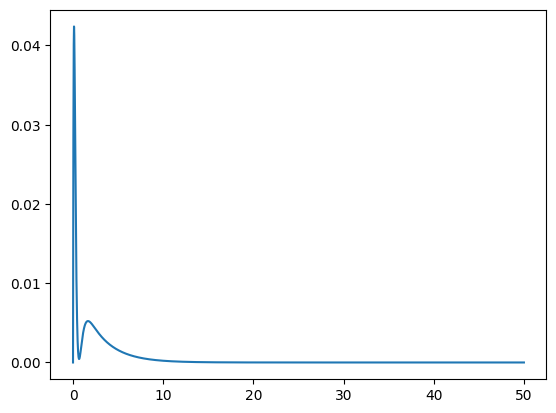

(-4895*sqrt(13)*exp(-4*t)*sinh(sqrt(13)*t)/5421 + 1367*exp(-4*t)*cosh(sqrt(13)*t)/417)*Heaviside(t) + (-232*sqrt(3)*exp(-5*t/2)*sin(sqrt(3)*t/2)/12927 - 272*exp(-5*t/2)*cos(sqrt(3)*t/2)/4309)*Heaviside(t) - 299*exp(-8*t)*Heaviside(t)/93

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

s, t = sp.symbols('s, t')

f = (
    (s**3 + 4*s**2 + 6*s + 5)/
    ((s + 8)*(s**2 + 8*s + 3)*(s**2 + 5*s + 7))
)

ilap = sp.inverse_laplace_transform(f, s, t)

x = np.arange(0, 50, 0.01)
y = [ilap.subs(t, i) for i in x]

plt.plot(x, y)
plt.show()

ilap

# Zadanie 3

### Rozwiązać numerycznie równanie różniczkowe dla wektora czasu $ t\in [0,T_{end}] $ o kroku $ \Delta t $

$$ 5\ddot{x}(t)+\frac{1}{6}\dot{x}(t)+2x(t)=3+sin(3t) $$
Równanie różniczkowe 2 stopnia należy rozłożyć na układ 2 równań 1 stopnia:
$$
\begin{cases}
\frac{dx}{dt}=X \\
\frac{dX}{dt}=\frac{1}{5}(3+sin(3t)-2x-\frac{1}{6}X)
\end{cases}
$$

Wymagane definicje:

In [30]:
import sympy as sp
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

A = 3
B = 3
C = A + B

t = sp.symbols('t')
x = sp.Function('x')(t)
x_ = sp.Derivative(x, t)
x__ = sp.Derivative(x_, t)

def analytical(ics):
    eq = sp.Eq(5*x__ + (1/C)*x_ + 2*x, A + sp.sin(B*t))
    alg_sol = sp.dsolve(eq, ics=ics)
    return alg_sol

def numerical(dt, ics):
    t_end = 30
    t_eval = np.arange(0, t_end, dt)
    fs = lambda t,x : [x[1], 1/5 * (A + np.sin(B*t) - 2*x[0] - (1/C) * x[1])]
    sol = spi.solve_ivp(fs, (0, t_end), ics, t_eval=t_eval)
    return sol

Porównanie błędów rozwiązań numerycznych w zależności od $\Delta t$ dla różnych warunków początkowych:

In [37]:
for ics in [[0,0],[-2,1],[3,2]]:
    a_sol = analytical({x.subs(t, 0): ics[0], x_.subs(t, 0): ics[1]})
    for dt in np.arange(0.1, 5, 0.1):
        n_sol = numerical(dt, ics)
        print(f'ics={ics} ; dt={dt:.2f}:', round(sum([abs(a_sol.subs(t, n_sol.t[i]).rhs - n_sol.y[0][i]) for i in range(len(n_sol.t))])/sum([a_sol.subs(t, n_sol.t[i]).rhs for i in range(len(n_sol.t))])*100, 3), '%')
    print()

ics=[0, 0] ; dt=0.10: 0.083 %
ics=[0, 0] ; dt=0.20: 0.083 %
ics=[0, 0] ; dt=0.30: 0.083 %
ics=[0, 0] ; dt=0.40: 0.083 %
ics=[0, 0] ; dt=0.50: 0.082 %
ics=[0, 0] ; dt=0.60: 0.083 %
ics=[0, 0] ; dt=0.70: 0.079 %
ics=[0, 0] ; dt=0.80: 0.086 %
ics=[0, 0] ; dt=0.90: 0.086 %
ics=[0, 0] ; dt=1.00: 0.078 %
ics=[0, 0] ; dt=1.10: 0.082 %
ics=[0, 0] ; dt=1.20: 0.085 %
ics=[0, 0] ; dt=1.30: 0.083 %
ics=[0, 0] ; dt=1.40: 0.082 %
ics=[0, 0] ; dt=1.50: 0.074 %
ics=[0, 0] ; dt=1.60: 0.081 %
ics=[0, 0] ; dt=1.70: 0.080 %
ics=[0, 0] ; dt=1.80: 0.083 %
ics=[0, 0] ; dt=1.90: 0.080 %
ics=[0, 0] ; dt=2.00: 0.064 %
ics=[0, 0] ; dt=2.10: 0.073 %
ics=[0, 0] ; dt=2.20: 0.077 %
ics=[0, 0] ; dt=2.30: 0.089 %
ics=[0, 0] ; dt=2.40: 0.092 %
ics=[0, 0] ; dt=2.50: 0.075 %
ics=[0, 0] ; dt=2.60: 0.088 %
ics=[0, 0] ; dt=2.70: 0.122 %
ics=[0, 0] ; dt=2.80: 0.088 %
ics=[0, 0] ; dt=2.90: 0.087 %
ics=[0, 0] ; dt=3.00: 0.078 %
ics=[0, 0] ; dt=3.10: 0.075 %
ics=[0, 0] ; dt=3.20: 0.075 %
ics=[0, 0] ; dt=3.30: 0.084 %
ics=[0, 0]

### Rozwiązanie analityczne (ręczne) dla wartości początkowych $[0,0]$:
$$
5\ddot{x}(t)+\frac{1}{6}\dot{x}(t)+2x(t)=3+sin(3t) \\
$$
$$
5X(s)s^2+\frac{1}{6}X(s)s+2X(s)=\frac{3s^2+3s+27}{s(s^2+9)} \\
$$
$$
X(s)=\frac{3s^2+3s+27}{s(s^2+9)(5s^2+\frac{1}{6}s+2)}
=\frac{A}{s}+\frac{Bs+C}{s^2+9}+\frac{Ds+E}{5s^2+\frac{1}{6}s+2}= \\
$$
$$
=\frac{
    5As^4+\frac{A}{6}s^3+47As^2+\frac{3}{2}As+18A+
    5Bs^4+\frac{B}{6}s^3+2Bs^2+
    5Cs^3+\frac{C}{6}s^2+2Cs+
    Ds^4+9Ds^2+
    Es^3+9Es
}{s(s^2+9)(5s^2+\frac{1}{6}s+2)}=
$$
$$
=\frac{
    (5A+5B+D)s^4 +
    (\frac{A}{6}+\frac{B}{6}+5C+E)s^3 +
    (47A+2B+\frac{C}{6}+9D)s^2 +
    (\frac{3}{2}A+2C+9E)s +
    18A
}{s(s^2+9)(5s^2+\frac{1}{6}s+2)}
$$
$$
\begin{cases}
5A+5B+D=0 \\
\frac{A}{6}+\frac{B}{6}+5C+E=0 \\
47A+2B+\frac{C}{6}+9D=3 \\
\frac{3}{2}A+2C+9E=3 \\
18A=27
\end{cases}
$$
$$
\begin{cases}
A=\frac{3}{2} \\
B=-\frac{2}{7397} \\
C=-\frac{516}{7397} \\
D=-\frac{110935}{14794} \\
E=\frac{8773}{88764}
\end{cases}
$$
$$
X(s)=\frac{3s^2+3s+27}{s(s^2+9)(5s^2+\frac{1}{6}s+2)}
=\frac{3}{2s}+\frac{-\frac{2}{7397}s+-\frac{516}{7397}}{s^2+9}+\frac{-\frac{110935}{14794}s+\frac{8773}{88764}}{5s^2+\frac{1}{6}s+2} \\
$$
$$
x(t)=(0.0708003404312415e^{−0.0166666666666667t}sin(0.632235891279689t)- \\
1.49972962011626e^{−0.0166666666666667t}cos(0.632235891279689t))θ(t)+ \\
(−0.0232526700013519sin(3.0t)−0.00027037988373665cos(3.0t))θ(t)+1.5θ(t)
$$

Graficzne porównanie rozwiązania analitycznego (recznego) i numerycznego dla wartości początkowych $[0,0]$:

Średni błąd: 0.0822597530430585 %


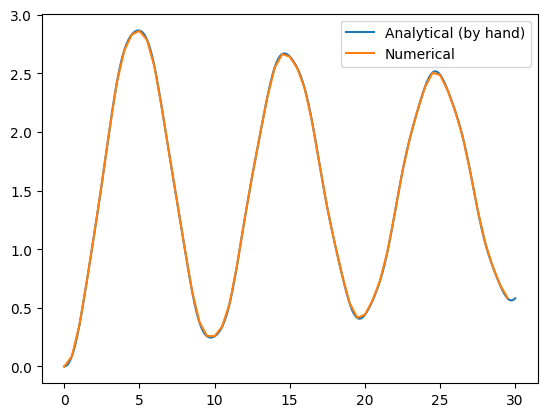

In [36]:

t = sp.symbols('t')

a_sol = (
    (0.0708003404312415*sp.exp(-0.0166666666666667*t)*sp.sin(0.632235891279689*t)
    - 1.49972962011626*sp.exp(-0.0166666666666667*t)*sp.cos(0.632235891279689*t))*sp.Heaviside(t)
    + (-0.0232526700013519*sp.sin(3.0*t) - 0.00027037988373665*sp.cos(3.0*t))*sp.Heaviside(t) + 1.5*sp.Heaviside(t)
)

t_end = 30
dt = 0.5

n_sol = numerical(dt, [0, 0])

plt.plot(np.linspace(0, t_end, t_end*100), [a_sol.subs(t, i) for i in np.linspace(0, t_end, t_end*100)], label='Analytical (by hand)')
plt.plot(n_sol.t, n_sol.y[0], label='Numerical')
print(f'Średni błąd: {sum([abs(a_sol.subs(t, n_sol.t[i]) - n_sol.y[0][i]) for i in range(len(n_sol.t))])/sum([abs(a_sol.subs(t, n_sol.t[i])) for i in range(len(n_sol.t))])*100} %')
plt.legend()
plt.show()

### Obserwacje i wnioski:
- Niezależnie od wartości $\Delta t $ błąd pozostaje na podobnym poziomie z minimalnymi zawachaniami.
- Wykresy rozwiązań analitycznego (ręcznego) i numerycznego niemal pokrywają się, co zgadza się z wartością błędu na niskim poziomie.
- Powyższe obserwacje wykazują względnie wysoką dokładność podejścia numerycznego do rozwiązywania równań różniczkowych

# Zadanie 4

### Zastosowanie Transformaty Laplace'a po obu stronach równania różniczkowego z poprzedniego zadania

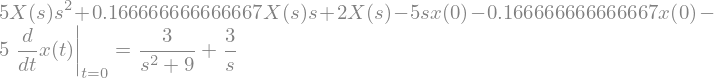

In [117]:
laplace_eq = sp.Eq(sp.laplace_transform(diff_eq.lhs, t, s, noconds=True), sp.laplace_transform(diff_eq.rhs, t, s, noconds=True))
X_s = sp.Symbol('X(s)')
laplace_eq = laplace_eq.subs(sp.laplace_transform(x_t, t, s, noconds=True), X_s)
laplace_eq

### Podstawienie warunków początkowych

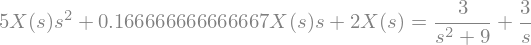

In [118]:
init_conds = {x_t.subs(t, 0): 0, x_t.diff(t).subs(t, 0): 0}
laplace_eq = laplace_eq.subs(init_conds)
laplace_eq

### Rozwiązanie dla X(s)

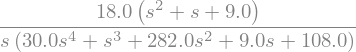

In [119]:
X_s_solution = sp.solve(laplace_eq, X_s)[0]
X_s_solution

### Przejście na dziedzinę czasu, odwrotna transformacja Laplace'a rozwiązania X(s) -> Otrzymujemy rozwiązanie x(t)

In [120]:
sp.inverse_laplace_transform(X_s_solution, s, t).simplify()

Wynik jest ten sam jak przy użyciu funkcji sympy.dsolve, co sugeruje jego poprawność